# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# mobilenetV1 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10.tnt_solver import *
from cifar10.classifiers.mobilenet import MobileNetV1

model = MobileNetV1(num_classes=10)
print(model)
num_params = count_parameters(model)
print('params num:', num_params)

MobileNetV1(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU6(inplace)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
      (3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1

# train 

In [3]:
%%time

import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=True)
loss_fn = F.cross_entropy

lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5, min_lr=1e-4)
history = main(model, opt, epoch=150, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/150, lr:1.00e-01
100%|██████████| 625/625 [00:45<00:00, 13.72it/s, loss:1.6046, acc:40.7975%]
Val loss: 1.4866, accuracy: 49.36%
Epoch: 2/150, lr:1.00e-01
100%|██████████| 625/625 [00:45<00:00, 13.77it/s, loss:1.1188, acc:59.9875%]
Val loss: 1.0533, accuracy: 62.78%
Epoch: 3/150, lr:1.00e-01
100%|██████████| 625/625 [00:45<00:00, 13.75it/s, loss:0.8686, acc:69.7350%]
Val loss: 0.8882, accuracy: 71.43%
Epoch: 4/150, lr:1.00e-01
100%|██████████| 625/625 [00:44<00:00, 13.94it/s, loss:0.7434, acc:74.5650%]
Val loss: 0.6856, accuracy: 77.11%
Epoch: 5/150, lr:1.00e-01
100%|██████████| 625/625 [00:43<00:00, 14.27it/s, loss:0.6552, acc:77.6625%]
Val loss: 0.6193, accuracy: 79.25%
Epoch: 6/150, lr:1.00e-01
100%|██████████| 625/625 [00:46<00:00, 13.39it/s, loss:0.5981, acc:79.6150%]
Val loss: 0.5879, accuracy: 80.12%
Epoch: 7/150, lr:1.00e-01
100%|██████████| 625/625 [00:44<

100%|██████████| 625/625 [00:44<00:00, 13.97it/s, loss:0.0090, acc:99.7525%]
Val loss: 0.3631, accuracy: 92.40%
Epoch: 60/150, lr:3.13e-03
100%|██████████| 625/625 [00:43<00:00, 14.51it/s, loss:0.0081, acc:99.7675%]
Val loss: 0.3562, accuracy: 92.76%
Epoch: 61/150, lr:3.13e-03
100%|██████████| 625/625 [00:45<00:00, 13.85it/s, loss:0.0080, acc:99.7725%]
Val loss: 0.3623, accuracy: 92.52%
Epoch: 62/150, lr:3.13e-03
100%|██████████| 625/625 [00:44<00:00, 14.00it/s, loss:0.0070, acc:99.8150%]
Val loss: 0.3555, accuracy: 92.60%
Epoch: 63/150, lr:3.13e-03
100%|██████████| 625/625 [00:44<00:00, 14.07it/s, loss:0.0072, acc:99.8050%]
Val loss: 0.3573, accuracy: 92.58%
Epoch: 64/150, lr:3.13e-03
100%|██████████| 625/625 [00:45<00:00, 13.84it/s, loss:0.0076, acc:99.7775%]
Val loss: 0.3712, accuracy: 92.47%
Epoch: 65/150, lr:3.13e-03
100%|██████████| 625/625 [00:42<00:00, 14.79it/s, loss:0.0065, acc:99.8325%]
Val loss: 0.3619, accuracy: 92.61%
Epoch: 66/150, lr:3.13e-03
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:42<00:00, 14.78it/s, loss:0.0030, acc:99.9325%]
Val loss: 0.3662, accuracy: 92.80%
Epoch: 119/150, lr:1.00e-04
100%|██████████| 625/625 [00:45<00:00, 13.88it/s, loss:0.0031, acc:99.9425%]
Val loss: 0.3631, accuracy: 92.69%
Epoch: 120/150, lr:1.00e-04
100%|██████████| 625/625 [00:43<00:00, 14.47it/s, loss:0.0029, acc:99.9525%]
Val loss: 0.3661, accuracy: 92.72%
Epoch: 121/150, lr:1.00e-04
100%|██████████| 625/625 [00:42<00:00, 14.80it/s, loss:0.0029, acc:99.9450%]
Val loss: 0.3673, accuracy: 92.76%
Epoch: 122/150, lr:1.00e-04
100%|██████████| 625/625 [00:44<00:00, 14.08it/s, loss:0.0027, acc:99.9425%]
Val loss: 0.3664, accuracy: 92.71%
Epoch: 123/150, lr:1.00e-04
100%|██████████| 625/625 [00:44<00:00, 14.08it/s, loss:0.0029, acc:99.9400%]
Val loss: 0.3670, accuracy: 92.73%
Epoch: 124/150, lr:1.00e-04
100%|██████████| 625/625 [00:42<00:00, 14.74it/s, loss:0.0028, acc:99.9400%]
Val loss: 0.3690, accuracy: 92.69%
Epoch: 125/150, lr:1.00e-04
100%|██████████| 625

# plot loss history
We check the classifier by plotting the loss and acc.

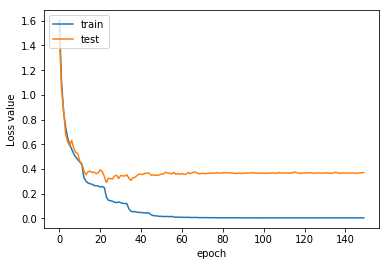

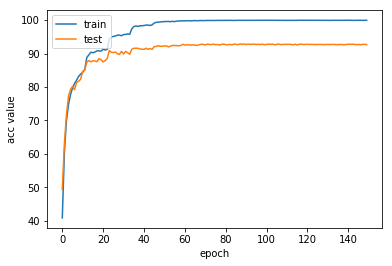

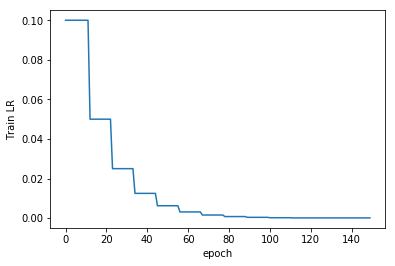

In [4]:
plot_history(history)